<a href="https://colab.research.google.com/github/atharvmendhe18/antariksh_lec_py/blob/main/radar_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.attention.multi_head_attention import activation

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path)

X,y = df.values[:, :-1], df.values[:, -1]

X = X.astype('float32')

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [2]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1]

(234, 34) (116, 34) (234,) (116,)


In [3]:
from keras.engine.training import optimizer
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal', input_shape = (n_features,)))

model.add(tf.keras.layers.Dense(8,activation='relu', kernel_initializer='he_normal'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32,  epochs = 60)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)

print('Test Accuracy: %.3f' % acc)



Epoch 1/60
8/8 [==============================] - 6s 277ms/step - loss: 0.7736 - accuracy: 0.5427 - val_loss: 0.7009 - val_accuracy: 0.6552
Epoch 2/60
8/8 [==============================] - 0s 54ms/step - loss: 0.7174 - accuracy: 0.5940 - val_loss: 0.6606 - val_accuracy: 0.6724
Epoch 3/60
8/8 [==============================] - 0s 35ms/step - loss: 0.6788 - accuracy: 0.6282 - val_loss: 0.6321 - val_accuracy: 0.7069
Epoch 4/60
8/8 [==============================] - 0s 33ms/step - loss: 0.6511 - accuracy: 0.6581 - val_loss: 0.6094 - val_accuracy: 0.7069
Epoch 5/60
8/8 [==============================] - 0s 25ms/step - loss: 0.6278 - accuracy: 0.6624 - val_loss: 0.5913 - val_accuracy: 0.7069
Epoch 6/60
8/8 [==============================] - 0s 48ms/step - loss: 0.6081 - accuracy: 0.7051 - val_loss: 0.5758 - val_accuracy: 0.7155
Epoch 7/60
8/8 [==============================] - 0s 20ms/step - loss: 0.5915 - accuracy: 0.7222 - val_loss: 0.5625 - val_accuracy: 0.7328
Epoch 8/60
8/8 [==========

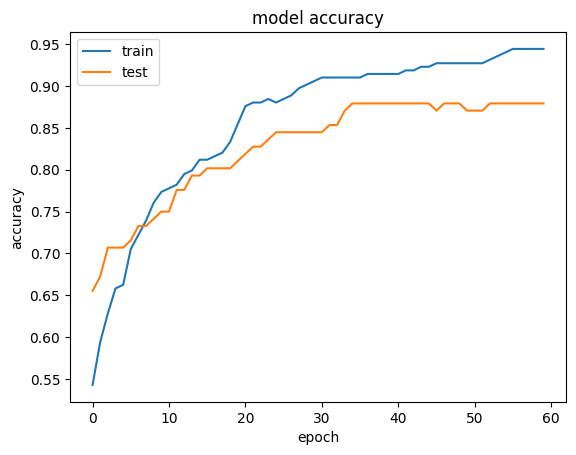

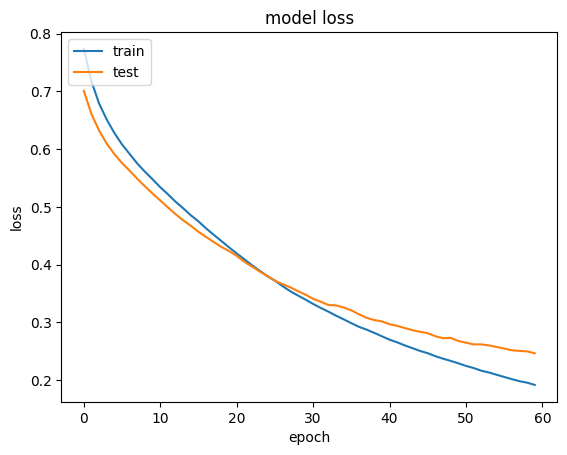

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


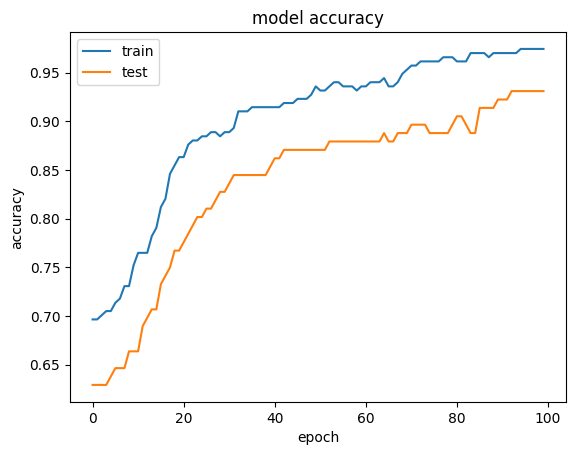

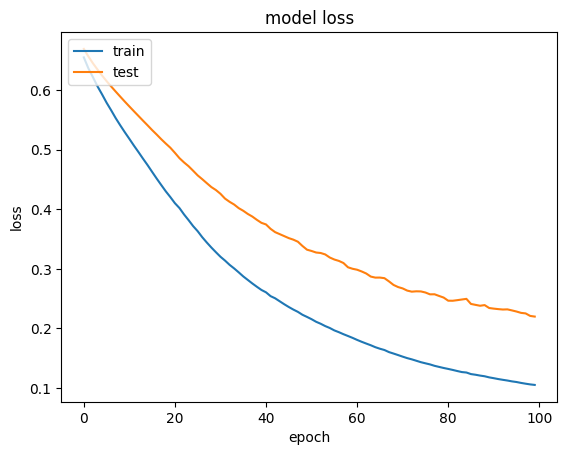

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
